In [139]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [141]:
df = pd.read_csv("C:/Users/User/Desktop/LoanApprovalPrediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [143]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [147]:
obj = (df.dtypes == object)
column_with_have_type_object = obj[obj].index
print(f'Признаки с типом object: {column_with_have_type_object}')

Признаки с типом object: Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


In [149]:
for i in column_with_have_type_object:
    label_encoder = LabelEncoder()
    df[i] = label_encoder.fit_transform(df[i])

print(f'Количество признаков с типом object после Label Encoding: {(df.dtypes == object).sum()}')

Количество признаков с типом object после Label Encoding: 0


In [151]:
print(f'Имена признаков до удаления ID: {df.columns}')
df.drop(columns = 'Loan_ID', inplace = True)
print(f'Имена признаков после удаления ID: {df.columns}')

Имена признаков до удаления ID: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Имена признаков после удаления ID: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


<h2>Рассматриваем количество объектов каждого признака, являющегося категориальным типом данных

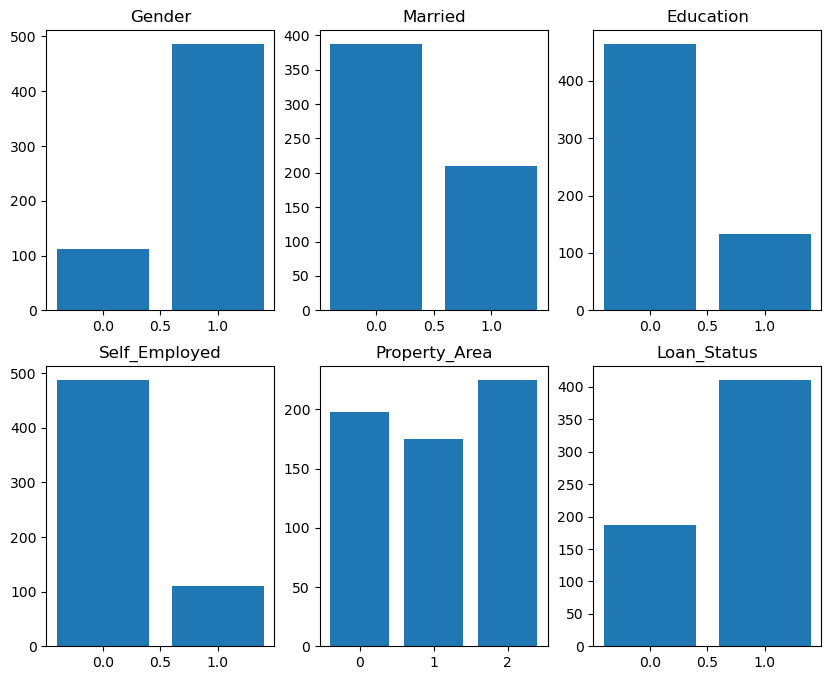

In [154]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3,figsize = (10,8))

name_of_plots = [ax1,ax2,ax3, ax4,ax5,ax6]
c = 0
for i in column_with_have_type_object[1:]:
    name_of_plots[c].bar(df[i].unique(), df[i].value_counts())
    name_of_plots[c].set_title(i)
    c+=1
plt.show()

<h2>Рассматриваем корреляцию между парами признаков датасета

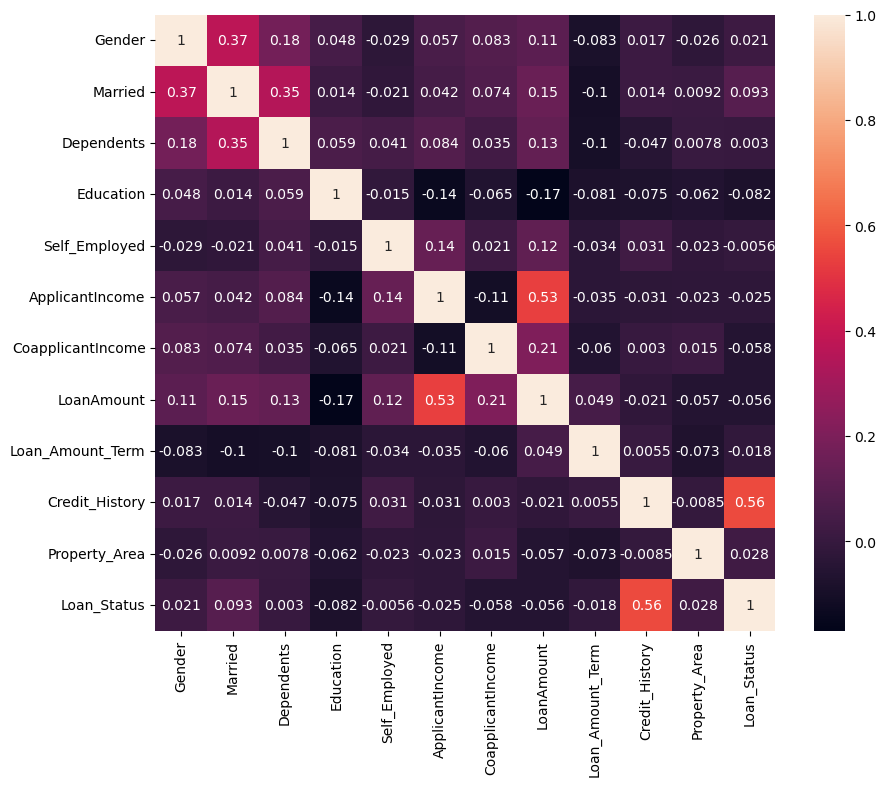

In [156]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot= True)
plt.show()

In [157]:
print('Доля пропущенных значений:')
df.isnull().sum()/len(df)

Доля пропущенных значений:


Gender               0.000000
Married              0.000000
Dependents           0.020067
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035117
Loan_Amount_Term     0.023411
Credit_History       0.081940
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [158]:
df_new = df.copy()
df_new.dropna(inplace = True)

In [159]:
df_new.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [160]:
X = df_new.drop(columns= 'Loan_Status')
y = df_new['Loan_Status']
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2.0,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0
594,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0
595,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2
596,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2


Разделяем выборку на тренировочную и тестовую 

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =42)
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
207,1,1,1.0,0,1,7787,0.0,240.0,360.0,1.0,2
329,1,1,2.0,0,1,2500,4600.0,176.0,360.0,1.0,0
580,1,1,2.0,1,1,6383,1000.0,187.0,360.0,1.0,0
88,1,1,0.0,0,0,5695,4167.0,175.0,360.0,1.0,1
366,0,0,0.0,0,1,2764,1459.0,110.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
523,1,1,0.0,0,0,6133,3906.0,324.0,360.0,1.0,2
27,1,0,0.0,1,0,1442,0.0,35.0,360.0,1.0,2
267,1,1,0.0,0,0,2620,2223.0,150.0,360.0,1.0,1
513,1,1,0.0,0,0,3775,0.0,110.0,360.0,1.0,1


Масштабируем данные (стандартизация)
$$ new_x = (x - mean) / StandartDiviation$$

In [165]:
X_train = StandardScaler().fit_transform(X_train)

X_test = StandardScaler().fit_transform(X_test)
X_test

array([[ 0.4958847 ,  0.74230749,  0.24669408, ...,  0.29692228,
         0.41137668,  1.11123344],
       [ 0.4958847 ,  0.74230749,  1.26014002, ...,  0.29692228,
         0.41137668, -1.39109964],
       [ 0.4958847 ,  0.74230749,  1.26014002, ...,  0.29692228,
         0.41137668, -1.39109964],
       ...,
       [ 0.4958847 ,  0.74230749, -0.76675187, ...,  0.29692228,
         0.41137668, -0.1399331 ],
       [ 0.4958847 ,  0.74230749, -0.76675187, ...,  0.29692228,
         0.41137668, -0.1399331 ],
       [-2.01659779, -1.34715063,  0.24669408, ...,  0.29692228,
         0.41137668, -0.1399331 ]])

In [ ]:
sns.pairplot(pd.DataFrame(X_train))
plt.show()

<h2>Создаем ансамбль из трех модлей: DecisionTreeClassifier, SGDClassifier, KNeighborsClassifier - по принципу стэккинг

In [ ]:
class StackingEnsemble():
    def __init__(self):
        self.KNN = KNeighborsClassifier()
        self.linear = SGDClassifier()
        self.tree = DecisionTreeClassifier()

    def fit(self, X_train, y_train):
        self.KNN.fit(X_train, y_train)
        self.linear.fit(X_train, y_train)
        self.tree.fit(X_train, y_train)
        
    def predict(self, X_test):
        KNN_pred = self.KNN.predict(X_test)
        linear_pred = self.linear.predict(X_test)
        tree_pred = self.tree.predict(X_test)
        pred_value = ((KNN_pred + linear_pred + tree_pred) / 3)
        pred_value = np.where(pred_value > 0.5, 1,0)
        return pred_value 

    def accuracy(self, y_test, y_pred):
        assert y_test.size == y_pred.size
        return (y_test == y_pred).sum() / len(y_pred)
    

In [ ]:
model = StackingEnsemble()

model.fit(X_train,y_train)

In [ ]:
pr = model.predict(X_test)

model.accuracy(pr, y_test)

<h2>Вывод: создал ансамбль по принципу стэккинг, из трех моделей, которая показала на тестовой выборке по метркике accuracy - 0.8092105263157895